In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

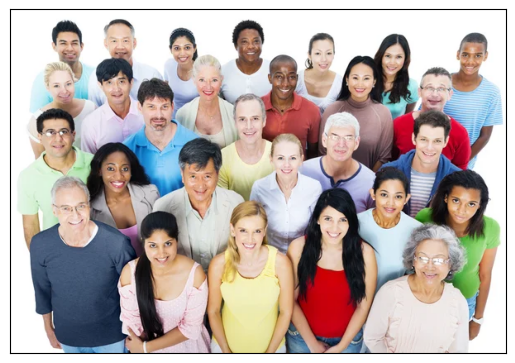

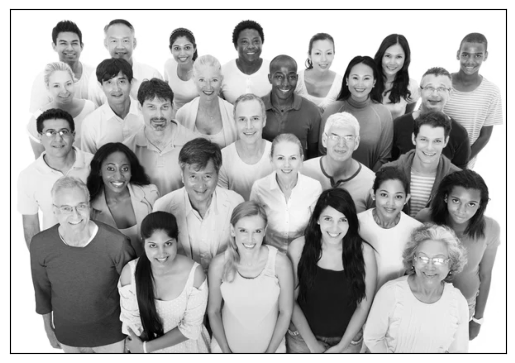

In [55]:
#read the image
img=mpimg.imread('group-of-people.jpg')
imgplot = plt.imshow(img)
plt.show(plt.xticks([]), plt.yticks([]))

# Convert color image to grayscale for Viola-Jones
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(gray_img, cmap = 'gray')
plt.show(plt.xticks([]), plt.yticks([]))

In [56]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

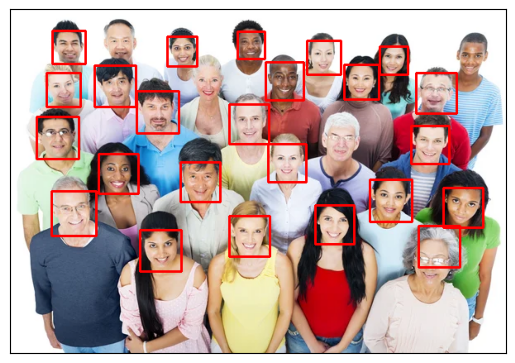

In [99]:
#find faces
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.2, minNeighbors=3)

imgFinal = img.copy()
# Draw the face bounding box
for (x, y, w, h) in faces:
        cv2.rectangle(imgFinal, (x, y), (x+w, y+h), (255, 0, 0), 2)

imgplot = plt.imshow(imgFinal)
plt.show(plt.xticks([]), plt.yticks([]))

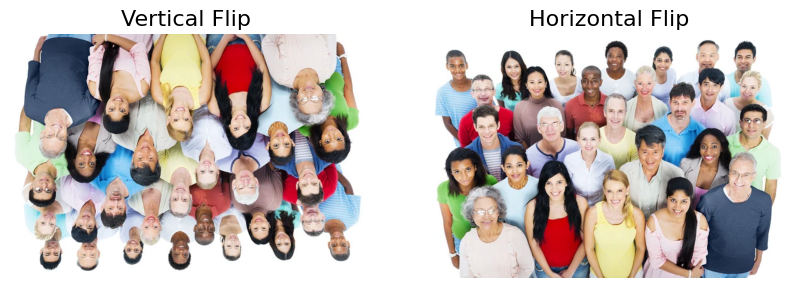

In [58]:
#Flip the image
imgVerticallyFlipped = cv2.flip(img, 0)
imgHorizontallyFlipped = cv2.flip(img, 1)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10))

axs[0].imshow(imgVerticallyFlipped,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Vertical Flip', fontsize=16)

axs[1].imshow(imgHorizontallyFlipped,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Horizontal Flip', fontsize=16)
plt.show(plt.xticks([]), plt.yticks([]))


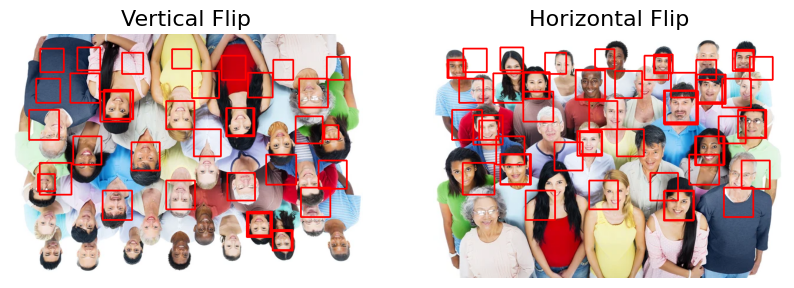

In [82]:
#find faces 
imgVerticallyFlipped_gray = cv2.cvtColor(imgVerticallyFlipped, cv2.COLOR_BGR2GRAY)
imgHorizontallyFlipped_gray = cv2.cvtColor(imgHorizontallyFlipped, cv2.COLOR_BGR2GRAY)

facesHorizontal = face_cascade.detectMultiScale(imgHorizontallyFlipped_gray, scaleFactor=1.2, minNeighbors=3)
facesVertical = face_cascade.detectMultiScale(imgVerticallyFlipped_gray, scaleFactor=1.2, minNeighbors=3)

# Draw the face bounding box
for (x, y, w, h) in facesHorizontal:
        cv2.rectangle(imgHorizontallyFlipped, (x, y), (x+w, y+h), (255, 0, 0), 2)

for (x, y, w, h) in facesVertical:
        cv2.rectangle(imgVerticallyFlipped, (x, y), (x+w, y+h), (255, 0, 0), 2)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10))

axs[0].imshow(imgVerticallyFlipped)
axs[0].axis('off')
axs[0].set_title('Vertical Flip', fontsize=16)

axs[1].imshow(imgHorizontallyFlipped)
axs[1].axis('off')
axs[1].set_title('Horizontal Flip', fontsize=16)
plt.show(plt.xticks([]), plt.yticks([]))

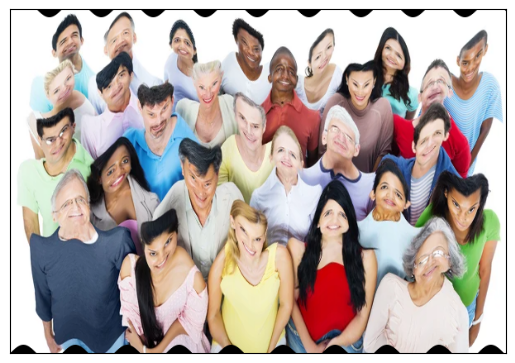

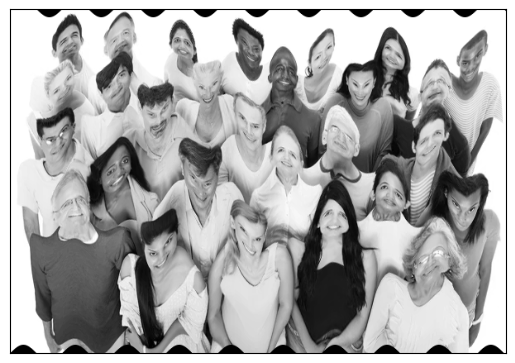

In [76]:
rows,cols = img.shape[:2]
map_x = np.zeros((rows,cols),np.float32)
map_y = np.zeros((rows,cols),np.float32)

for i in range(rows):
    for j in range(cols):
        map_x[i,j] = j
        map_y[i,j] = i + 10*np.sin(j/10)

dst = cv2.remap(img,map_x,map_y,cv2.INTER_LINEAR)

imgplot = plt.imshow(dst)
plt.show(plt.xticks([]), plt.yticks([]))

# Convert color image to grayscale for Viola-Jones
gray_dst_img = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(gray_dst_img, cmap = 'gray')
plt.show(plt.xticks([]), plt.yticks([]))

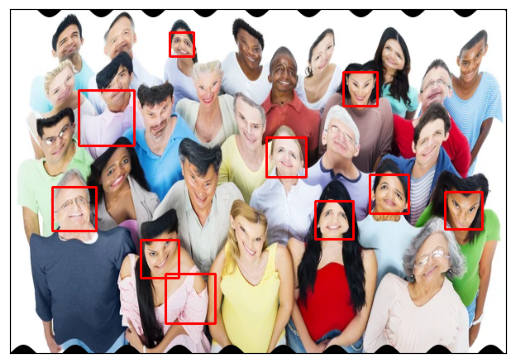

In [101]:
#find faces
faces = face_cascade.detectMultiScale(gray_dst_img, scaleFactor=1.2, minNeighbors=3)

imgFinal = dst.copy()
# Draw the face bounding box
for (x, y, w, h) in faces:
        cv2.rectangle(imgFinal, (x, y), (x+w, y+h), (255, 0, 0), 2)

imgplot = plt.imshow(imgFinal)
plt.show(plt.xticks([]), plt.yticks([]))

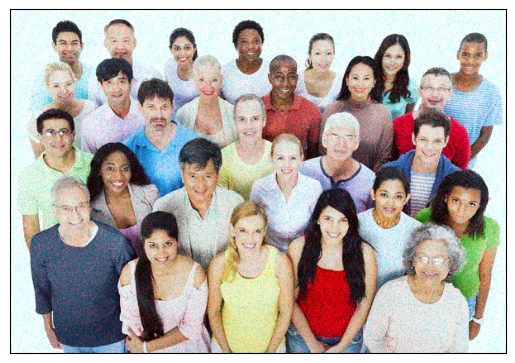

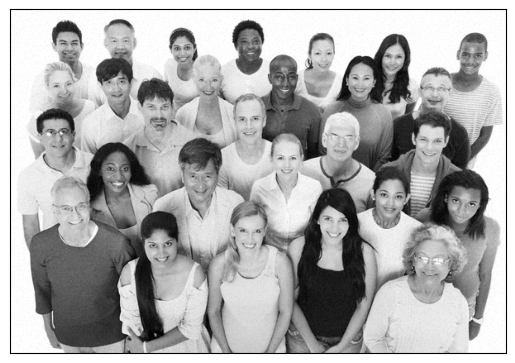

In [94]:
# Add Gaussian noise
mean = 0
stddev = 50
noise = np.zeros(img.shape, np.int32)
cv2.randn(noise, mean, stddev)
noisy_img = cv2.add(img, noise, dtype=cv2.CV_8UC3)

imgplot = plt.imshow(noisy_img)
plt.show(plt.xticks([]), plt.yticks([]))
# Convert color image to grayscale for Viola-Jones
gray_noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(gray_noisy_img,cmap='gray')
plt.show(plt.xticks([]), plt.yticks([]))

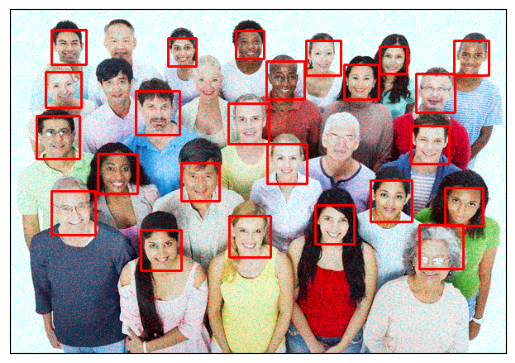

In [100]:
#find faces
faces = face_cascade.detectMultiScale(gray_noisy_img, scaleFactor=1.2, minNeighbors=3)

imgFinal = noisy_img.copy()
# Draw the face bounding box
for (x, y, w, h) in faces:
        cv2.rectangle(imgFinal, (x, y), (x+w, y+h), (255, 0, 0), 2)

imgplot = plt.imshow(imgFinal)
plt.show(plt.xticks([]), plt.yticks([]))